<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/Bai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [ ]:
#khai bien doc dia chi
train_data ='drive/MyDrive/AI/BAITAPAI/train'
test_data='drive/MyDrive/AI/BAITAPAI/test'

In [ ]:
listdata_train=[]
listdata_validation=[]
listdata_test=[]
dict={'dung':[1],'duy':[0]}

In [ ]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(83, 1)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])
x_test.shape

(23, 150, 150, 3)

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['duy','dung']
x_pre=x_test
y_pre=y_test
y_pre

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

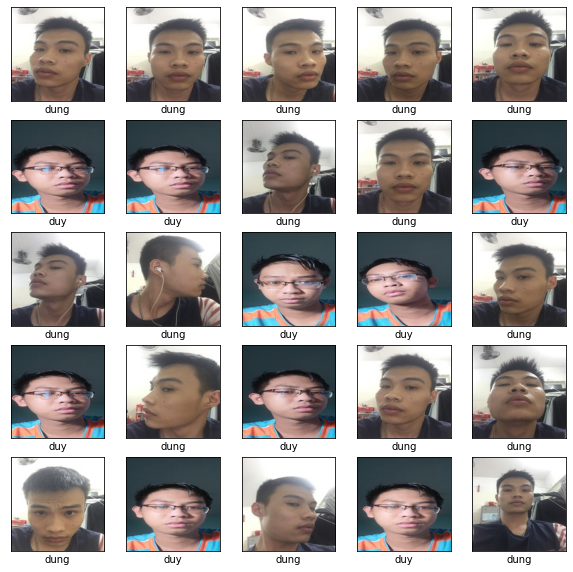

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(83,67500)
x_test=x_test.reshape(23,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 35,086,850
Trainable params: 35,086,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6288 - accuracy: 0.5904
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6526 - accuracy: 0.9639
Epoch 3/200
1/1 [==============================] - 0s 35ms/step - loss: 294.6915 - accuracy: 0.4819
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 335.1237 - accuracy: 0.5181
Epoch 5/200
1/1 [==============================] - 0s 33ms/step - loss: 8.6175e-09 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 34ms/step - loss: 1.4363e-09 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.00

In [ ]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0
Test accuary 1.0


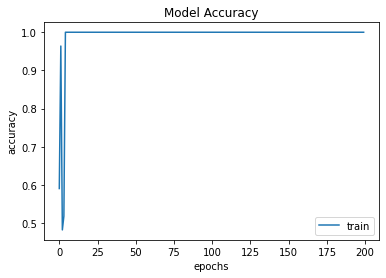

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

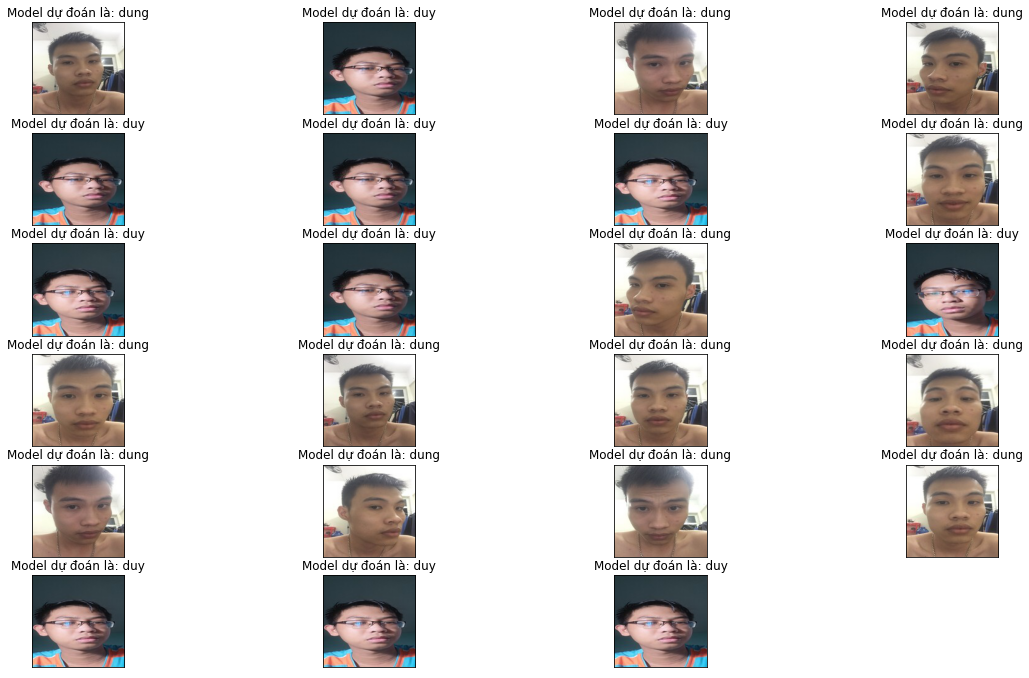

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(23):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()